<a href="https://colab.research.google.com/github/sejin-sim/Hands_On_ML/blob/master/%5B%ED%95%B8%EC%A6%88%EC%98%A8%5D_Chapter2_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - 집 값 예측 프로젝트
- 주요 단계
1. 큰 그림을 본다.
2. 데이터를 구한다.
3. 데이터로부터 통찰을 얻기 위해 탐색 및 시각화
4. 머신러닝 알고리즘을 위해 데이터를 준비
5. 모델을 선택하고 훈련
6. 모델을 상세하게 조정
7. 솔루션을 제시
8. 시스템을 론칭, 모니터링 및 유지 보수

## 1. 큰 그림 보기
- 목적 : 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만들자!
- 데이터 : 인구, 중간 소득, 중간 주택 가격 등   

1. 문제 정의 : 비지니스의 목적이 정확히 무엇인가?
 - 어떤 알고리즘을 선택할지? 모델 평가에 어떤 성능 지표를 사용할지? 모델 튜닝을 위해 얼마나 노력을 투여할지?
 - 파이프 라인(pipeline) : 데이터 처리 컴포넌트(component)들이 연속되어 있는 것
 - 결론 : 레이블된 훈련 샘플로 **지도 학습**, 값을 예측함으로 회귀 문제고 여러 특성이므로 **다중 회귀 문제**, 데이터의 연속적인 흐름이 없고 데이터가 메모리에 들어갈 만큼 작으므로 일반적인 **배치 학습**이 적절

2. 성능 측정 지표
 - 평균 제곱근 오차(root mean square error. RMSE) : 회귀 문제의 전형적인 성능 지표. 예측의 오류를 가늠   
 ![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F997C68385BF6ACDD03)
  > - $m$ : 데이터 셋에 있는 샘플 수
  > - $x^{(i)}$ : i번째 샘플(레이블 제외한)의 전체 특성 값의 백터
  > - $y^{(i)}$ : 해당 레이블(해당 샘플의 기대 출력 값) 
  > - $X$ : 데이터셋에 모든 샘플의 특성 값(레이블 제외)을 포함하는 행렬.
  > - $h$ : 시스템의 예측 함수로 가설(hypothesis). 시스템이 벡터 $x^{(i)}$를 받으면 그 샘플에 대한 예측 값 $ {\hat y^{(i)}} = h(x^{(i)})$를 출력합니다.       
 - 평균 절대 오차(mean absolute error. MAE) :  이상치 많은 경우   
  <img src = https://dojinkimm.github.io/assets/imgs/ml/handson_2_2.png width="400" height="150">

 - RMSE & MAE 모두 예측 값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법
 > 1. 멘하튼 노름(L1) : 절대값의 합을 계산
 > 2. 유클리디안 노름(L2) : 제곱항을 합한 것의 제곱근(RMSE) 계산
 > - 노름의 지수가 클수록 큰 값의 원소에 치우치며, 작은 값은 무시된다.
 > - RMSE가 MAE 보다 조금 더 이상치에 민감하다. = 이상치에 드물면 RMSE가 잘 맞는다.

 <br/>

## 2. 데이터 가져오기
### 1) 데이터 읽기

In [36]:
# 셋팅
import sys
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib.font_manager as fm
import seaborn as sns
import warnings

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# warnings.filterwarnings(action='ignore') 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [37]:
path_drive = '/content/drive/My Drive/Colab Notebooks/dataset/handson'
housing = pd.read_csv(path_drive + '/housing.csv')

In [38]:
# 데이터 구조 흝어보기
print("<read the data with 'display()'>")
display(housing)
print("<read the data with 'head()'>")
housing.head()

<read the data with 'display()'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<read the data with 'head()'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
# 데이터에 간략한 설명, 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는데 유용
housing.info() 
# total_bedrooms 20640 - 20433 = 207 Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
# object인 ocean_proximity 필드의 카테고리 갯수
housing['ocean_proximity'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [41]:
# describe() :숫자형 특성의 요약 정보를 보여준다.
housing.describe()
# std : 표준편차
# 25%, 50%, 75% : 백분위수(percentile)
# 25% : 25번째 백분위 수(= 제1사분위수 quartile)
# 75% : 75번째 백분위 수(= 제3사분위수)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


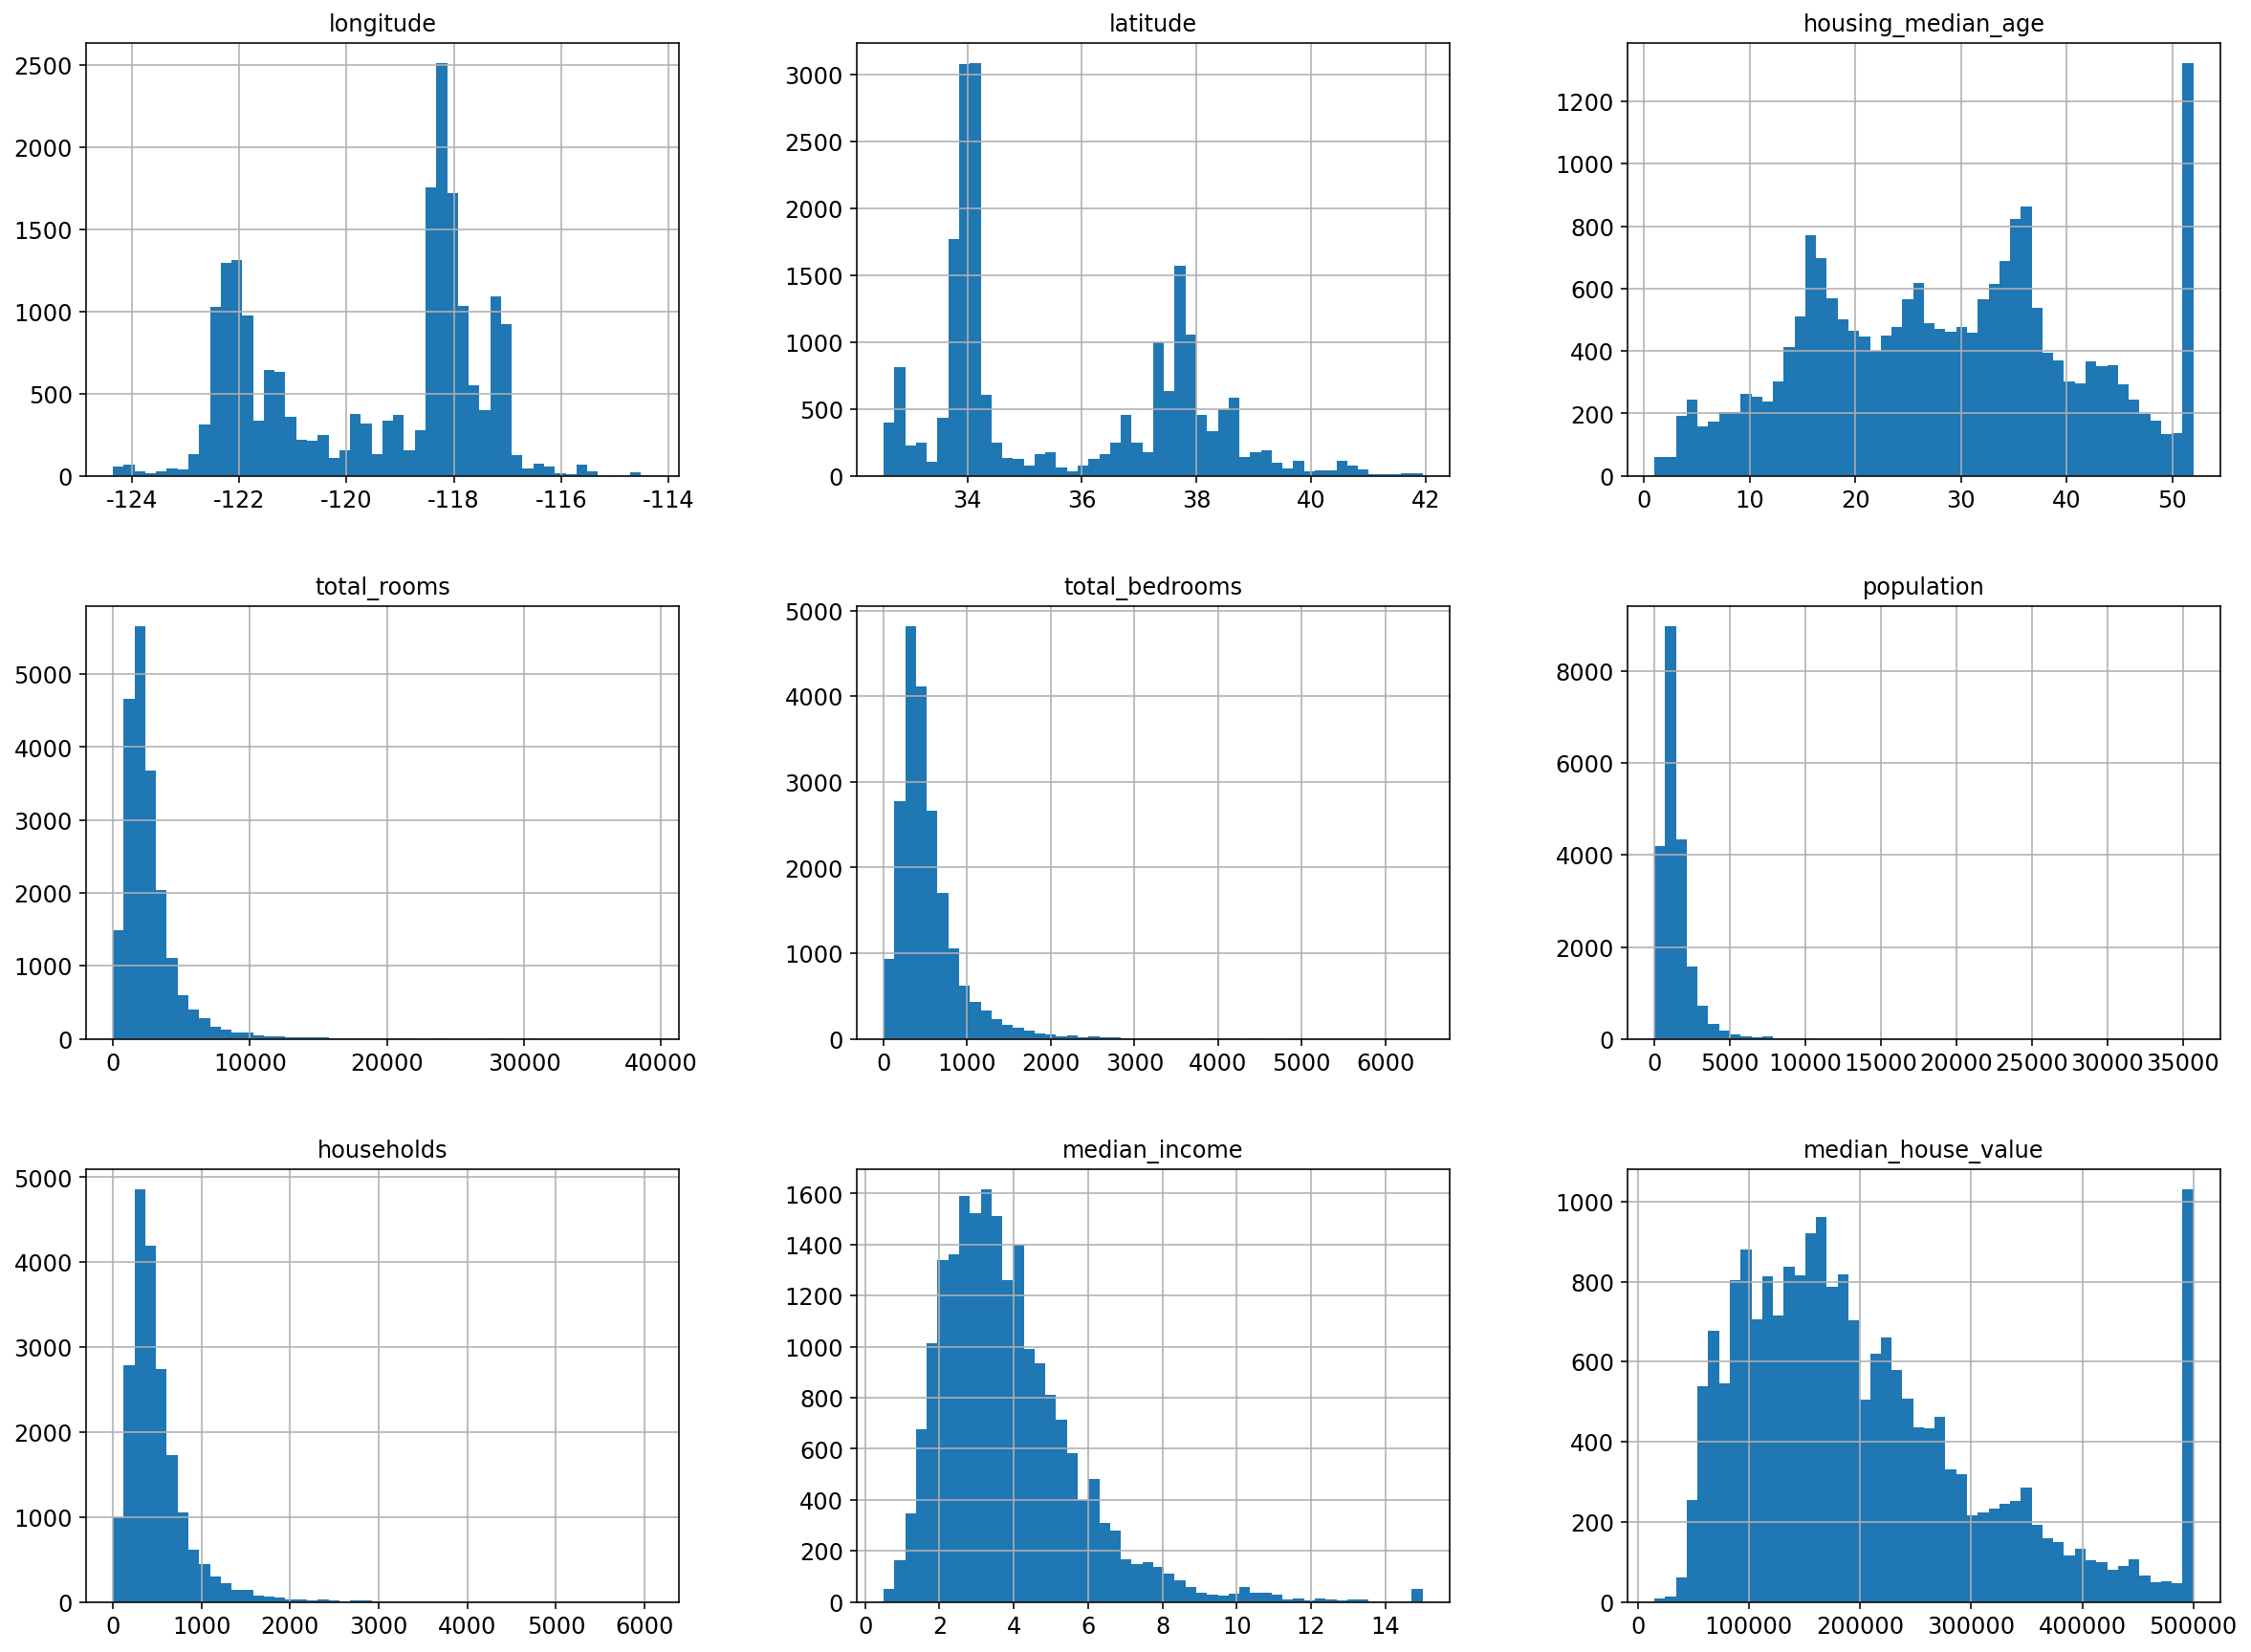

In [42]:
# hist() : 데이터를 빠르게 검토하는 방법. 각 숫자형 특성을 히스토그램으로 그릴 수 있다. 수직축 : 샘플 수
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# 1. median income은 단위가 생략되어 있다.
# 2. housing median age & median house vlaue는 최댓값과 최솟값이 한정되어져 있다.
# 3. 많은 히스토그램의 꼬리가 두꺼운 것은 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있는 것이다.
# 4. 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만든다. 

### 2) 테스트 세트 만들기
- 테스트 세트로 일반화 오차를 추정시 데이터 스누핑(data snooping) 편향이 발생될 수 있다.
- 무작위로 샘플을 선택해서 20%를 떼어놓으면 된다.

In [43]:
# 무작위 샘플링
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # test는 20%로 부여

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64


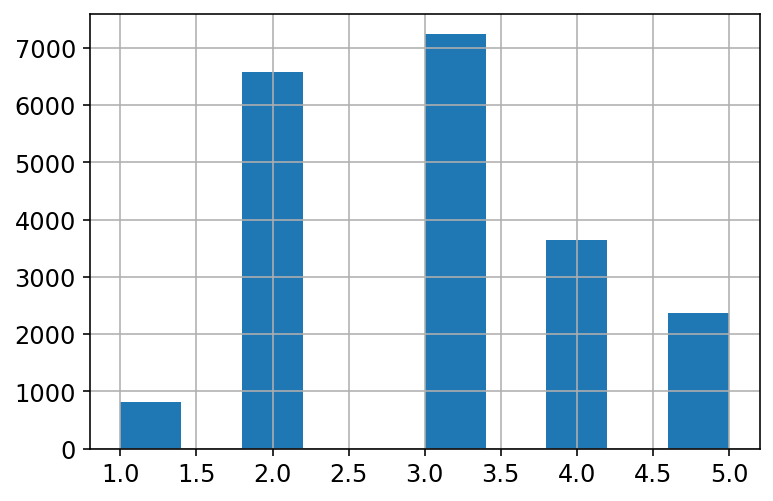

In [44]:
# 계층적 샘플링 : 계층이라는 동질의 그룹으로 나눠서 테스트 세트가 전체 인구를 대표하도록 샘플을 추출

# 카테고리 5개를 가진 소득 카테고리 특성을 만든다.
# 카테고리1 : 0~1.5, 카테고리2 : 1.5~3
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

print(housing["income_cat"].value_counts())

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  start_train_set = housing.loc[train_index] 
  start_test_set = housing.loc[test_index]

print("\n<테스트 세트에서 소득 카테고리의 비율>")
start_test_set['income_cat'].value_counts() / len(start_test_set)


<테스트 세트에서 소득 카테고리의 비율>


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [46]:
print("\n<전체 데이터 세트에서 소득 카테고리의 비율>")
print(housing["income_cat"].value_counts() / len(housing))

print("\n<계층 샘플링과 순수한 무작위 샘플링의 샘플링 편향 비교>")
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall(전체)": income_cat_proportions(housing),
    "Stratified(계층샘플링)": income_cat_proportions(start_test_set),
    "Random(무작위 샘플링)": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error(무작위 샘플링 오류율)"] = 100 * compare_props["Random(무작위 샘플링)"] / compare_props["Overall(전체)"] - 100
compare_props["Strat. %error(계층 샘플링 오류율)"] = 100 * compare_props["Stratified(계층샘플링)"] / compare_props["Overall(전체)"] - 100
compare_props


<전체 데이터 세트에서 소득 카테고리의 비율>
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

<계층 샘플링과 순수한 무작위 샘플링의 샘플링 편향 비교>


,Overall(전체),Stratified(계층샘플링),Random(무작위 샘플링),Rand. %error(무작위 샘플링 오류율),Strat. %error(계층 샘플링 오류율)
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [47]:
# 데이터를 원래 상태로 되돌린다.
for set_ in (start_train_set, start_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

### 3) 데이터 이해를 위한 탐색과 시각화

In [48]:
# 훈련 세트를 손상 시키지 않기 위해 복사본을 만들어 사용
housing = start_train_set.copy()

1. 지리적 데이터 시각화

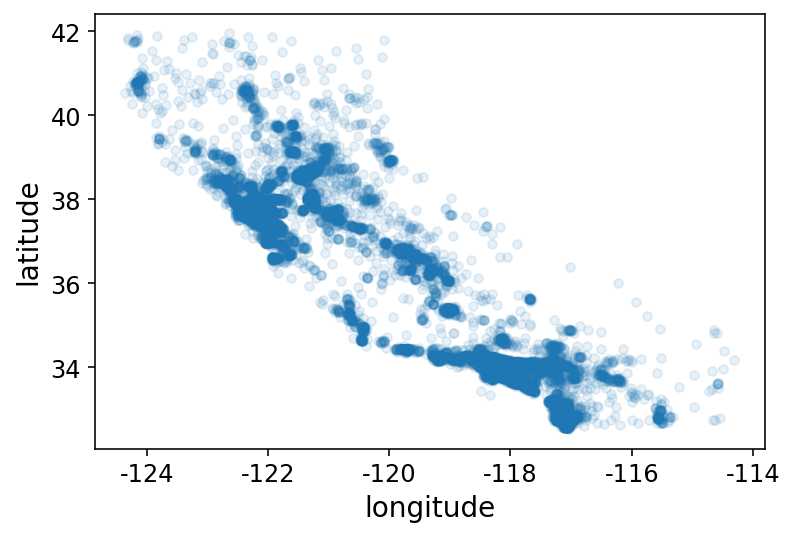

In [49]:
# 지리 정보에 위도(latitude)와 경도(longitude)가 있으니, 모든 구역을 산점도로 만들어 데이터를 시각화
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# alpha 옵션을 주면 밀집된 영역을 보여줌

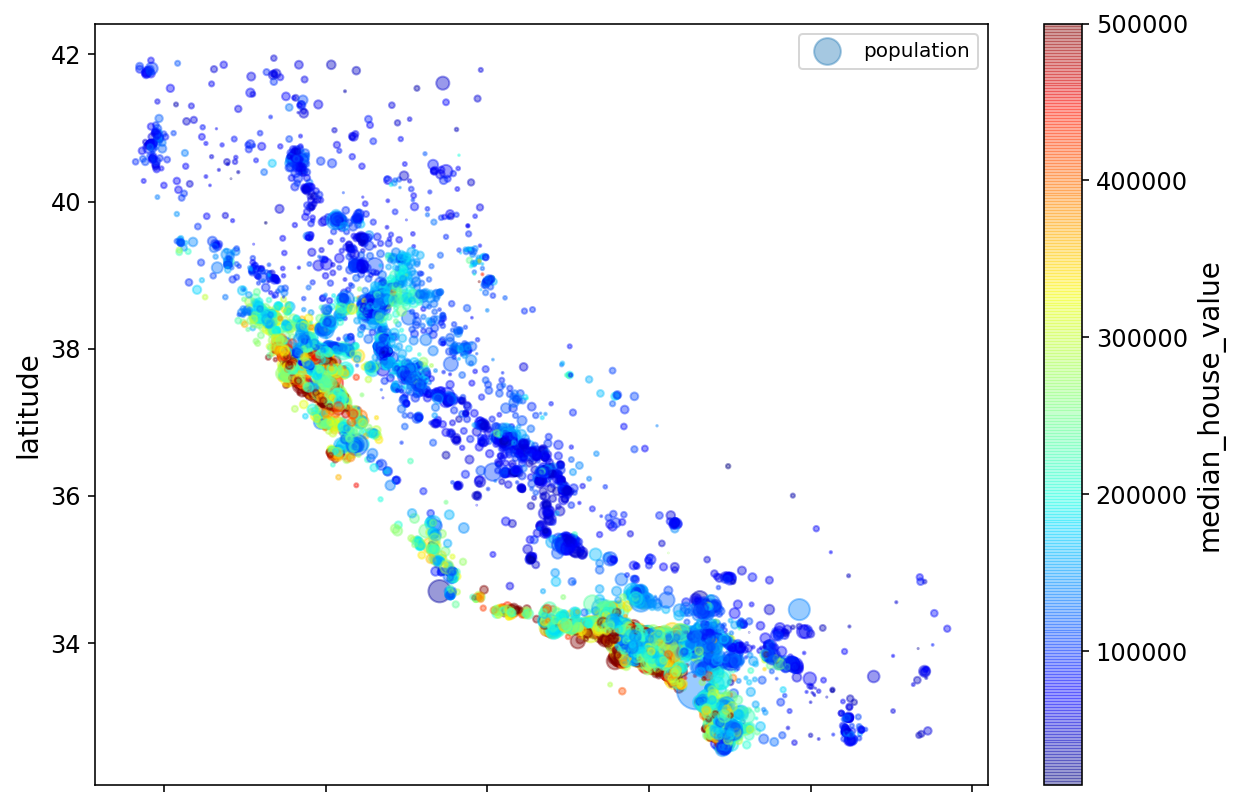

In [50]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing['population']/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
# s : 원의 반지름 = 구역의 인구 (큰 원은 인구가 밀집된 지역)
# c : 색상은 가격
# cmap : 파란색(낮)~빨간색(높)

2. 상관관계 조사
 - 표준 상관계수(standard correlation coefficient) : 피어슨의 $r$   
 ㄴ corr() 메서드 이용하여 쉽게 계산 가능

In [51]:
corr_matrix = housing.corr() # 모든 특성간의 표준 상관계수

corr_matrix['median_house_value'].sort_values(ascending=False)
# 1에 가까우면 강한 양의 상관관계, -1에 가까우면 음의 상관관계, 0에 가까우면 관계x. but 비선형 상관관계는 잡을 수 없음

# 중간 소득(median_income) 양의 상관관계 : 소득이 올라갈 수록 주택 가격이 증가하는 경향
# 위도(latitude) 약한 음의 상관관계 : 북쪽으로 갈수록 주택 가격이 조금씩 내려가는 경향

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

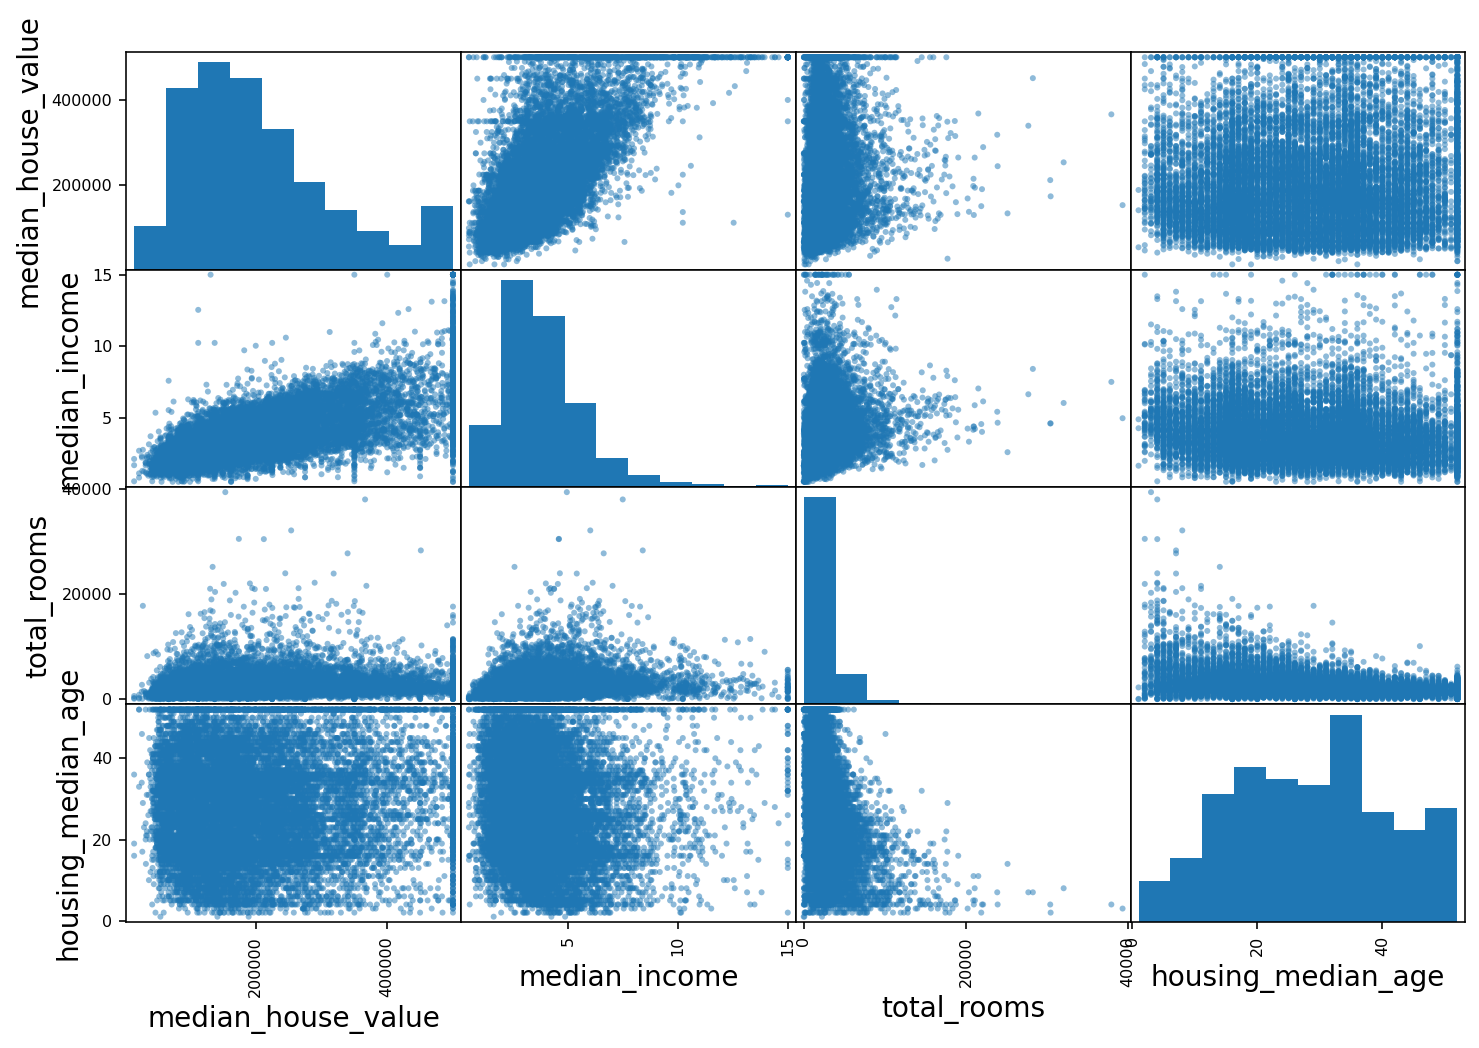

In [52]:
# 판다스의 scatter_matrix : 숫자형 특성 사이에 산점도를 그려준다. (특성 사이에 상관관계 확인)
from pandas.plotting import scatter_matrix # 숫자형 특성 사이에 산점도를 그려줌

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

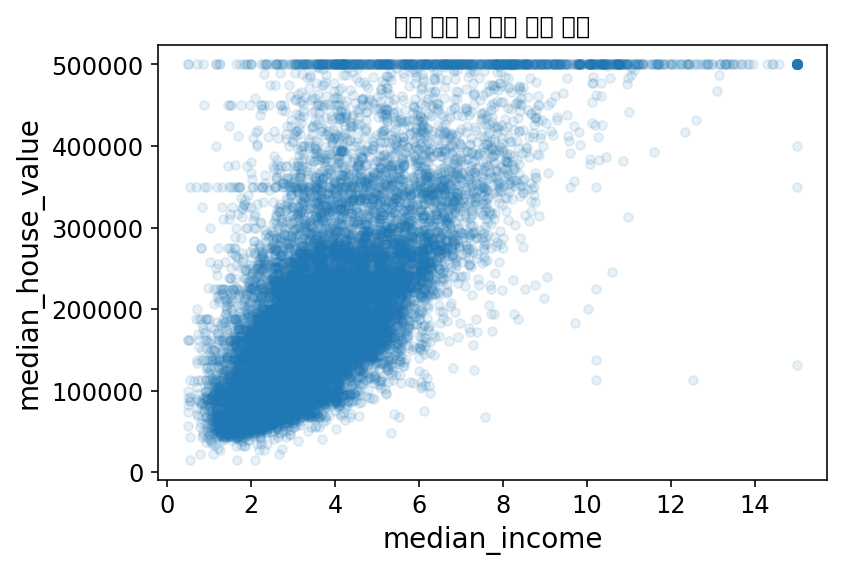

In [53]:
# 중간 소득 산점도를 확대
housing.plot(kind='scatter', x="median_income", y='median_house_value', alpha=0.1)
plt.title("중간 소득 대 중간 주택 가격")
plt.show()

# 상관관계가 매우 강하고, 가격 제한이 보인다. = 제한선은 제거하는게 좋다. 

3. 특성 조합으로 실험
 - 정제해야 할 조금 이상한 데이터를 확인했고, 특성 사이에서 흥미로운 상관관계를 발견했습니다.

In [54]:
# 특성 조합을 만들어 보자

housing['room_per_household'] = housing["total_rooms"] / housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# bedrooms_per_room          -0.259984 : 침대/방의 비율이 낮은 집은 더 비싼 경향이 있다.

median_house_value          1.000000
median_income               0.687160
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 4. 머신러닝 알고리즘을 위한 데이터 준비
 - 머신러닝 알고리즘을 위해 데이터를 준비

In [55]:
# train & test set으로 데이터 복사
housing = start_train_set.drop("median_house_value", axis = 1) 
housing_labels = start_train_set["median_house_value"].copy()

### 1) 데이터 정제 : total_bedrooms의 결측 값
 - 해당구역을 제거
 - 전체 특성을 삭제
 - 어떤 값으로 채운다.

In [56]:
# 데이터 정제
housing.dropna(subset=["total_bedrooms"]) # 옵션 1
housing.drop("total_bedrooms", axis=1)   # 옵션 2
median = housing["total_bedrooms"].median() # 옵션 3 중간 값을 계산하고 누락된 값을 이 값으로 채워 넣는다.
housing["total_bedrooms"].fillna(median, inplace=True)

In [57]:
# SimpleImputer : 누락된 값을 손쉽게게 중간 값으로 대체해 준다.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [58]:
X = imputer.transform(housing_num) # 학습한 중간 값으로 바꾸는 것
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index) # 판다스 프레임으로 간단히 되돌림.

### 2) 텍스트와 범주형 특성 다루기

In [59]:
# 처음 10개 샘플에서 특성값을 확인

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [60]:
# OrdinalEncoder : 텍스트를 숫자로 변환
from sklearn.preprocessing import OrdinalEncoder 

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [61]:
# categories_ 변수를 사용해 카테고리 목록을 얻을 수 있다.

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [62]:
# OneHotEncoder : 범주의 값을 원-핫 벡터로 바꾸기 위한 onehotencoder 클래스를 제공합니다.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot           # 원소의 위치만 저장된 희소 행렬
housing_cat_1hot.toarray() # toarray() : 밀집된 넘파이 배열로 바꾸는 메쏘드

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [63]:
# categories_ 변수를 사용해 카테고리 목록을 얻을 수 있다.
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 3) 나만의 변환기
 - 특별한 정제 작업이나 어떤 특성을 조합하는 등의 작업 필요
 - 사이킷런 덕 타이핑(duck typing) : fit(), transform(), fit_transform()

In [64]:
# 조합 특성을 추가하는 간단한 변환기

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      add_bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, add_bedrooms_per_room]

    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### 4) 특성 스케일링(feature scaling) = 모든 특성의 범위를 같게 만들어 주는 방법
 - min-max 스케일링(scaling) : 0 ~ 1 범위에 들도록 값을 이동하고 스케일을 조정 (꼭 0~1 아니어도 됨)
  <img src=https://blog.kakaocdn.net/dn/bP9Oi0/btqDFqUGJnx/8aUXiwQ0Ijo2yAV3GEM9Tk/img.png>

 - 표준화(standardization) : 평균을 뺀 후 표준편차로 나눠서 결과 분포의 분산이 1이 되도록 함. min-max와 달리 범위의 상한과 하한이 없다.     
 <img src=https://blog.kakaocdn.net/dn/b6UnBF/btqDCYLOhAH/0sLyvmxkj1IC03Mkt8kWgK/img.png>

### 5) 변환 파이프 라인





In [68]:
# Pipeline : 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스
# StandardScaler : 표준화를 위한 변환기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 숫자 특성을 처리하는 간단한 파이프라인
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # 이름 / 추정기
    ('attribs_adder', CombinedAttributesAdder()),  # 이름 / 추정기
    ('std_scaler', StandardScaler())               # 이름 / 추정기       
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [66]:
# 주택 가격 데이터에 전체 변환을 적용
from sklearn.compose import ColumnTransformer 

num_attribs = list(housing_num)   # 수치형 열 이름의 리스트
cat_attribs = ["ocean_proximity"] # 범주형 열 이름의 리스트

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),      # 리스트 : 이름, 변환기, 변환기가 적용될 열 이름
                                   ("cat", OneHotEncoder(), cat_attribs)])
# OneHotEncoder : 희소 행렬을 반환
# num_pipeline : 밀집 행렬을 반환 
# 희소행렬과 밀집행렬이 섞여 있는 경우 ColumnTransformer는 최종 행렬의 밀접 정도를 추정
# 밀집도가 임계값(default 0.3)보다 낮으면 희소 행렬을 반환함.
housing_prepared = full_pipeline.fit_transform(housing)

## 5. 모델 선택과 훈련   
### 1) 훈련세트에서 훈련하고 평가하기

In [69]:
# 선형 회귀(LinearRegression) 모델 훈련
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [73]:
# 훈련 세트에 대해 RMSE 측정
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE :", lin_rmse) # 과소적합

RMSE : 68628.19819848923


In [75]:
# 의사 결정 트리(DecisionTreeRegressor) 모델 훈련
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE :", tree_rmse) # 과대 적합

RMSE : 0.0


### 2) 교차 검증을 사용한 평가
 - 단순 교차 검증(cross_val_score) 
 - k-겹 교차 검증(k-fold cross-validation)

In [84]:
# 단순 교차 검증(cross_val_score) 
from sklearn.model_selection import cross_val_score

# 결정 트리 모델
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
# fold 라 불리는 10개의 서브셋으로 무작위 분할, 결정 트리 모델을 10번 훈련하고 평가함
# 매번 다른 폴드를 선택해 평가에 사용하고 나머지 9개 폴드는 훈련에 사용한다.

def display_scores(scores):
  print("점수 :", scores)
  print("평균 : ", scores.mean())
  print("표준편차 :", scores.std())
display_scores(tree_rmse_scores)
# 10개의 평가 점수가 담긴 배열이 결과가 된다.

점수 : [69244.04200233 67060.88436115 69464.42447581 69764.36224644
 70127.01164405 74346.41705269 70867.58587564 69858.08304937
 77308.17285613 69517.80473177]
평균 :  70755.87882953744
표준편차 : 2777.7856842129763


In [85]:
# 선형 회귀 모델
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

점수 : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 :  69052.46136345083
표준편차 : 2731.674001798344


ㄴ 결정 트리 모델(과대 적합)이 선형 회귀 모델보다 성능이 나쁘다.

In [87]:
# 앙상블 학습
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

18603.515021376355
점수 : [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균 :  50182.303100336096
표준편차 : 2097.0810550985693


ㄴ 랜덤 포레스트보다 점수가 좋지만, 아직도 훈련 세트 점수 < 검증 세트 점수 = overfitiing

## 6. 모델 세부 튜닝
### 1) 그리드 탐색 
 - 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 통해 평가하게 된다.

In [88]:
# RandomForestRegressor에 대한 그리드 서치
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [89]:
grid_search.best_params_ # 최적의 조합을 얻음

{'max_features': 8, 'n_estimators': 30}

In [90]:
grid_search.best_estimator_ # 최적의 추정기에 직접 접근

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [91]:
# 그리드서치에서 테스트한 하이퍼파라미터 조합의 점수를 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### 2) 랜덤 탐색
 - 각 반복 마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가

### 3) 앙상블 방법
 - 모델의 그룹(=앙상블)이 최상의 단일 모델보다 더 나은 성능을 발휘할 때가 많다.

### 4) 최상의 모델과 오차 분석

In [92]:
# 각 특성의 중요도
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [94]:
# 중요도 다음에 그에 대응하는 특성 이름을 표시
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

### 5) 테스트 세트로 시스템 평가하기

In [95]:
# 최종 모델 평가
final_model = grid_search.best_estimator_

X_test = start_test_set.drop("median_house_value", axis=1)
y_test = start_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47730.22690385927


In [96]:
# stats.t.interval : 일반화 오차의 95% 신뢰 구간(confidence interval) 계산
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

## 7. 론칭, 모니터링, 시스템 유지 보수
1) 데이터가 계속 변화함에 따라 데이터 셋을 업데이트하고 모델을 다시 훈련해야 한다.
 - 정기적으로 새로운 데이터를 수집하고 레이블을 라벨링
 - 모델을 훈련하고 하이퍼파라미터를 자동으로 세부 튜닝하는 스크립트를 작성
 - 업데이트된 테스트 세트에서 새로운 모델과 이전 모델을 평가하는 스크립트를 하나 더 작성

 <br/>

### 8. 결론
  - 데이터 준비 단계 → 모니터링 도구 구축 → 사람의 평가 파이프라인 셋팅 → 주기적인 모델 학습 자동화